In [4]:
import pandas as pd 
import numpy as np 
import requests 
import matplotlib.pyplot as plt
#import tweepy
import codecs
#from tweepy import OAuthHandler
import json
import seaborn as sns
from timeit import default_timer as timer

# Gathering Data 

### Loading twitter-archive-enhanced dataset

In [5]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv') 

In [6]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Loading Tweet image prediction data

In [7]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)
open('image_predictions.tsv', 'wb').write(r.content)


335079

In [8]:
image_predictions_df = pd.read_csv('image_predictions.tsv',sep = '\t')

In [10]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Twitter API and JSON data  

In [11]:
# Read text file line by line to create dataframe
tweetDate = []
with open('tweet-json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweetDate.append(tweet)
        except:
            continue
Twitter_API_df = pd.DataFrame(tweetDate, columns=list(tweetDate[0].keys()))

In [12]:
Twitter_API_df

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8853,39467,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6514,33819,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4328,25461,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8964,42908,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9774,41048,False,False,False,False,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,41,111,False,False,False,False,en
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,147,311,False,False,False,False,en
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,47,128,False,False,False,False,en
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,48,132,False,False,False,False,en


In [13]:
# select id , retweet_count , favorite_count columns only
Twitter_API_df = Twitter_API_df[['id', 'retweet_count', 'favorite_count']]
Twitter_API_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [14]:
# Save Dataframe for Visual Assessment
Twitter_API_df.to_csv("tweet_json.csv")
# Copy Dataframes for Cleaning so it can be compared with orginal after merging and cleaning dataframe.
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
Twitter_API_clean = Twitter_API_df.copy()

# Assessing Data

In [15]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [43]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [44]:
twitter_archive_clean.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [45]:
sum(twitter_archive_clean.duplicated())

0

In [46]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [48]:
image_predictions_clean.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [49]:
sum(image_predictions_clean.duplicated())

0

In [50]:
# duplicated url 
sum(image_predictions_clean.jpg_url.duplicated())

66

In [51]:
Twitter_API_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [52]:
Twitter_API_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [53]:
Twitter_API_clean.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000



### Quality Issues

It includes issues such as completeness, validity, Accuracy and consistency in data 

#### twitter_archive_clean
- remove tweet that has been retweet as its not original.
- change tweet_id from number to string.
- remove columns that are not needed for analysis.
- Change timestamp from string to date time and make separate columns for date and time.

#### image_predictions_clean
- P1 , P2 and P3 have inconsisitent capital words
- drop duplicate jpg_url.
- P1 , p2 and P3 have unnessary underscore instead of space.

#### Twitter_API_clean 
- rename id to tweet_id so can merge later.

## Tidiness

Tidy data is a standard way of mapping the meaning of a dataset to its structure. A dataset is messy or tidy depending on how rows, columns and tables are matched up with observations, variables and types. In tidy data:

- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.

#### issues
- combining do stages to one column.
- Newly created Date and time column needed to change from object(string) to date time format.
- perform inner join between three data frame as they all have data for same tweet.

### Cleaning Data

#### Quality issue #1.

#### Define: remove tweet that has been retweet as its not original.

#### code :



In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [55]:
# removing retweet from dataframe
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].notnull()== True].index, inplace= True)

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [57]:
# dropping  columns with retweet infomation
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis= 1 , inplace= True)

In [58]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Quality iusse #2.

#### Define: remove columns that are not needed for analysis. 

#### Code¶ 

In [63]:
# drop in_reply_to_status_id , in_reply_to_user_id columns
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace= True)

In [64]:
# test
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

#### Quality iusse #3.

#### Define: Change timestamp from string to date time and make separate columns for date and time.

#### Code:

In [65]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['date'] = twitter_archive_clean['timestamp'].apply(lambda time: time.strftime('%m/%d/%Y'))
twitter_archive_clean['time'] = twitter_archive_clean['timestamp'].apply(lambda time: time.strftime('%H:%M:%S'))

In [66]:
# test 
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
date                  2175 non-null object
time                  2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 254.9+ KB


In [67]:
# test
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08/01/2017,16:23:56
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08/01/2017,00:17:27
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07/31/2017,00:18:03
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07/30/2017,15:58:51
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07/29/2017,16:00:24


#### Quality iusse #4.

#### Define: p1 , p2 and p3 have inconsisitent capital words.

#### Code:

In [68]:
# make all string lower case 
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()

In [69]:
# test
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh_springer_spaniel,0.465074,True,collie,0.156665,True,shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Quality iusse #5.

#### Define: Drop duplicate jpg_url.

#### Code:

In [70]:
# dropping duplicates jpg_url
image_predictions_clean = image_predictions_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [71]:
sum(image_predictions_clean['jpg_url'].duplicated())

0

#### Quality issue # 6.

#### Define: p1, p2 and p3 have unnessary underscore instead of space .

#### Code:

In [72]:
# using string.replace function to repalce _ 
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.replace('_', ' ')
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.replace('_', ' ')
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.replace('_', ' ')

In [73]:
# test
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


#### Quality issue #7.

#### Define: rename id to tweet_id so can merge later
    
#### Code:

In [74]:
# changing column name from id to tweet_id
Twitter_API_clean.rename({'id': 'tweet_id'}, axis=1, inplace=True)

In [75]:
# test 
Twitter_API_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

#### Quality iusse #8¶

#### Define: change tweet_id from number to string.

#### Code:

In [76]:
# using as type function changing format type from number to string at all dataframes 
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype('str')
Twitter_API_clean['tweet_id'] = Twitter_API_clean['tweet_id'].astype('str')

#### Tidiness #1

#### Define: combining dog stages to one column.

#### Code:

In [77]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08/01/2017,16:23:56
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08/01/2017,00:17:27
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07/31/2017,00:18:03
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07/30/2017,15:58:51
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07/29/2017,16:00:24


In [78]:
twitter_archive_clean.doggo.value_counts()

None     2088
doggo      87
Name: doggo, dtype: int64

In [79]:
twitter_archive_clean.floofer.value_counts()

None       2165
floofer      10
Name: floofer, dtype: int64

In [80]:
twitter_archive_clean.pupper.value_counts()

None      1941
pupper     234
Name: pupper, dtype: int64

In [81]:
twitter_archive_clean.puppo.value_counts()

None     2150
puppo      25
Name: puppo, dtype: int64

In [82]:
# create new colum dog_stages for doggo, floofer, pupper and puppo
twitter_archive_clean['doggo'].replace("None","", inplace=True)
twitter_archive_clean['floofer'].replace("None","", inplace=True)
twitter_archive_clean['pupper'].replace("None","", inplace=True)
twitter_archive_clean['puppo'].replace("None","", inplace=True)
twitter_archive_clean['dog_stages'] = twitter_archive_clean.pop('doggo').str.title()+twitter_archive_clean.pop('floofer').str.title()+twitter_archive_clean.pop('pupper').str.title()+twitter_archive_clean.pop('puppo').str.title()
twitter_archive_clean['dog_stages'].replace("","None", inplace=True)  # if all none then filled with none


In [83]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stages
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,08/01/2017,16:23:56,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,08/01/2017,00:17:27,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,07/31/2017,00:18:03,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,07/30/2017,15:58:51,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,07/29/2017,16:00:24,None


In [84]:
twitter_archive_clean.dog_stages.value_counts()

None            1831
Pupper           224
Doggo             75
Puppo             24
DoggoPupper       10
Floofer            9
DoggoPuppo         1
DoggoFloofer       1
Name: dog_stages, dtype: int64

In [85]:
# convert Doggopupper values to Doggo, pupper
twitter_archive_clean [twitter_archive_clean.dog_stages == "DoggoPupper"] = "Doggo,Pupper"

In [86]:
# convert DoggoPuppo values to Doggo, Puppo
twitter_archive_clean [twitter_archive_clean.dog_stages == "DoggoPuppo"] = "Doggo,Puppo"

In [87]:
# convert DoggoFloofer values to Doggo, Floofer
twitter_archive_clean [twitter_archive_clean.dog_stages == "DoggoFloofer"] = "Doggo,Floofer"

In [88]:
# test
twitter_archive_clean.dog_stages.value_counts()

None             1831
Pupper            224
Doggo              75
Puppo              24
Doggo,Pupper       10
Floofer             9
Doggo,Puppo         1
Doggo,Floofer       1
Name: dog_stages, dtype: int64

In [89]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stages
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,08/01/2017,16:23:56,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,08/01/2017,00:17:27,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,07/31/2017,00:18:03,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,07/30/2017,15:58:51,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,07/29/2017,16:00:24,None


#### Tidiness #2.

#### Define: Newly created Date and time column needed to change from object(string) to date time format.

#### Code:

In [90]:
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['date'],errors='coerce')
twitter_archive_clean['time'] = pd.to_timedelta(twitter_archive_clean['time'],errors='coerce')

In [91]:
# test 
type(twitter_archive_clean['date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [92]:
# test 
type(twitter_archive_clean['time'].iloc[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [93]:
twitter_archive_clean.drop(columns='timestamp', inplace = True)

In [94]:
# test 
twitter_archive_clean.head()

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,date,time,dog_stages
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017-08-01,16:23:56,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017-08-01,00:17:27,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017-07-31,00:18:03,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017-07-30,15:58:51,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017-07-29,16:00:24,None


#### Tidiness #3.

#### Define: Merge twitter_archive_clean, image_predictions_clean and Twitter_API_clean dataframes.
    
#### Code:

In [95]:
# using merge function to make one  dataframe
df_all_cleaned = pd.merge(twitter_archive_clean, image_predictions_clean, on ='tweet_id', how= 'inner' )
df_all_cleaned = pd.merge(df_all_cleaned, Twitter_API_clean, on = 'tweet_id', how = 'inner' )

In [96]:
df_all_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1919 entries, 0 to 1918
Data columns (total 23 columns):
tweet_id              1919 non-null object
source                1919 non-null object
text                  1919 non-null object
expanded_urls         1919 non-null object
rating_numerator      1919 non-null object
rating_denominator    1919 non-null object
name                  1919 non-null object
date                  1919 non-null datetime64[ns]
time                  1919 non-null timedelta64[ns]
dog_stages            1919 non-null object
jpg_url               1919 non-null object
img_num               1919 non-null int64
p1                    1919 non-null object
p1_conf               1919 non-null float64
p1_dog                1919 non-null bool
p2                    1919 non-null object
p2_conf               1919 non-null float64
p2_dog                1919 non-null bool
p3                    1919 non-null object
p3_conf               1919 non-null float64
p3_dog            

#### Saving: cleaned data to CSV file¶

In [97]:
df_all_cleaned.to_csv('df_all_cleaned.csv', index= False, encoding='utf-8')

### Analyzing¶


In [98]:
df_all_cleaned.describe()

,time,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1919,1919.000000,1919.000000,1.919000e+03,1.919000e+03,1919.000000,1919.000000
mean,0 days 10:10:21.983324,1.202189,0.593291,1.340123e-01,6.013884e-02,2506.499218,8271.189682
std,0 days 08:37:31.112785,0.559099,0.273056,1.006857e-01,5.083140e-02,4179.466413,11359.530645
min,0 days 00:00:02,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,81.000000
25%,0 days 01:52:40.500000,1.000000,0.360115,5.388625e-02,1.614795e-02,610.500000,1862.000000
50%,0 days 04:44:55,1.000000,0.587372,1.166220e-01,4.965610e-02,1292.000000,3882.000000
75%,0 days 18:00:18,1.000000,0.847827,1.944965e-01,9.118695e-02,2909.500000,10249.000000
max,0 days 23:59:28,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [99]:
df_all_cleaned.p1.value_counts()

golden retriever             126
labrador retriever            89
pembroke                      87
chihuahua                     75
pug                           52
pomeranian                    38
chow                          38
samoyed                       37
toy poodle                    37
malamute                      28
french bulldog                26
cocker spaniel                24
chesapeake bay retriever      23
miniature pinscher            21
siberian husky                20
seat belt                     20
german shepherd               20
shetland sheepdog             18
staffordshire bullterrier     18
maltese dog                   18
teddy                         18
eskimo dog                    18
shih-tzu                      17
rottweiler                    17
kuvasz                        16
italian greyhound             16
beagle                        16
lakeland terrier              15
web site                      15
cardigan                      15
          

In [100]:
df_all_cleaned.p2.value_counts()

labrador retriever                85
golden retriever                  73
cardigan                          72
chihuahua                         42
chesapeake bay retriever          39
french bulldog                    38
pomeranian                        36
toy poodle                        35
siberian husky                    33
miniature poodle                  31
cocker spaniel                    30
beagle                            27
eskimo dog                        27
collie                            24
kuvasz                            23
pembroke                          23
italian greyhound                 22
pekinese                          21
chow                              20
malinois                          20
miniature pinscher                20
boston bull                       19
american staffordshire terrier    19
norwegian elkhound                19
samoyed                           18
staffordshire bullterrier         18
toy terrier                       18
p

In [101]:
df_all_cleaned.p3.value_counts()

labrador retriever                73
chihuahua                         56
golden retriever                  44
eskimo dog                        34
kelpie                            31
chow                              30
beagle                            29
toy poodle                        29
pekinese                          28
staffordshire bullterrier         28
cocker spaniel                    27
kuvasz                            27
pomeranian                        25
pembroke                          25
french bulldog                    24
great pyrenees                    24
malamute                          24
cardigan                          23
american staffordshire terrier    22
chesapeake bay retriever          21
bull mastiff                      19
pug                               19
basenji                           19
siberian husky                    19
boston bull                       17
shetland sheepdog                 17
toy terrier                       16
b

### Visualization

In [102]:
df_all_cleaned.dog_stages.value_counts()

None       1633
Pupper      199
Doggo        59
Puppo        21
Floofer       7
Name: dog_stages, dtype: int64

Text(0.5,1,'Number of dogs in each stage')

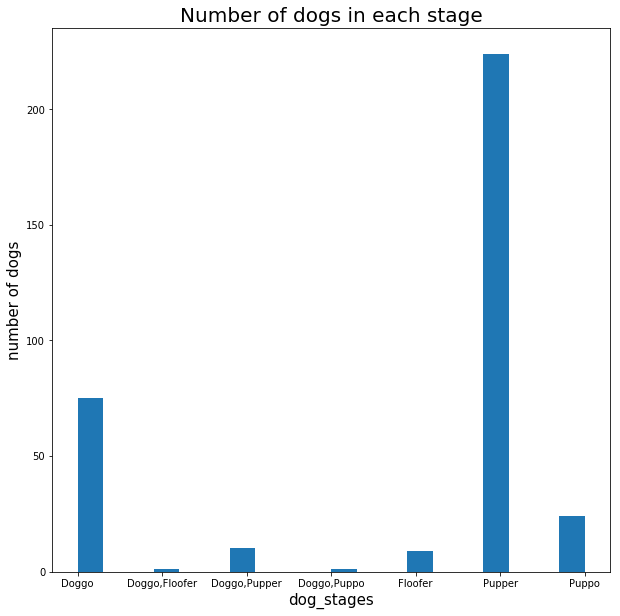

In [103]:
plt.figure(figsize=(10,10))
plt.hist(twitter_archive_clean[twitter_archive_clean.dog_stages !='None'].dog_stages,bins = 20)
plt.xlabel('dog_stages',fontsize = 15)
plt.ylabel('number of dogs',fontsize = 15)
plt.title('Number of dogs in each stage',fontsize = 20)

In [104]:
# pupper is the most commen dog in WeRateDogs tweets

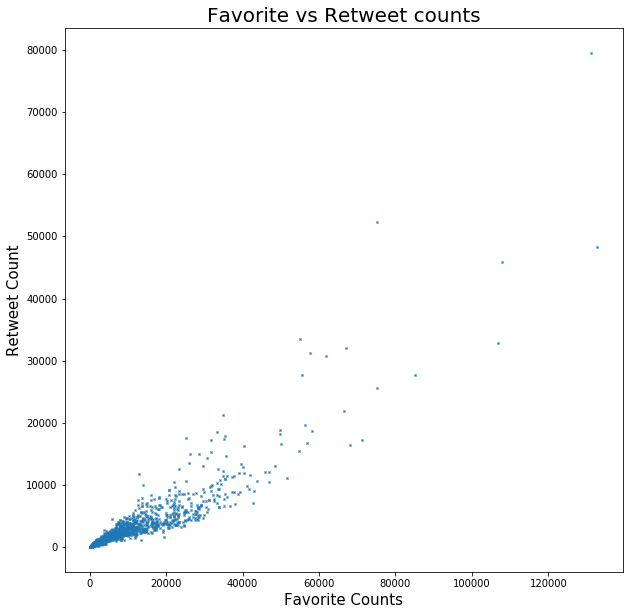

In [105]:
plt.figure(figsize = (10, 10))
plt.plot(df_all_cleaned.favorite_count, df_all_cleaned.retweet_count, marker='x', linestyle='', ms=2 )
plt.title('Favorite vs Retweet counts',fontsize = 20)
plt.xlabel('Favorite Counts',fontsize = 15)
plt.ylabel('Retweet Count',fontsize = 15)
plt.show()

In [99]:
# retweet counts and favorite counts are positively correlated 

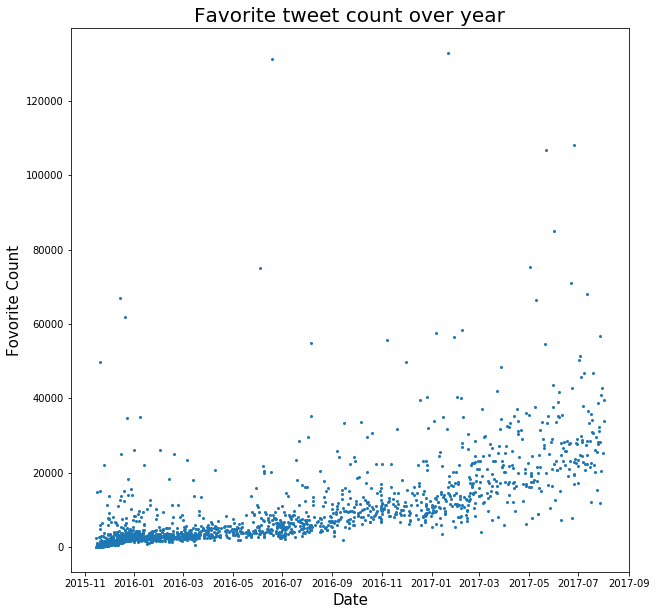

In [101]:
plt.figure(figsize = (10, 10))
plt.plot(df_all_cleaned.date,df_all_cleaned.favorite_count, marker = 'o', linestyle = '', ms = 2)
plt.title('Number of favorite tweets over year',fontsize = 20)
plt.xlabel('Date',fontsize = 15)
plt.ylabel('Fovorite Count',fontsize = 15)
plt.show()

In [100]:
# favorite count increases over years

In [ ]:
# references 
